Intrusion Framework V5:
- Coordinate 1 is obtained using the flow direction
- Structural builder to build the intrusion frame

Test on the construction of the intrusion
- Only using intersection in vectorial space g(p)

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer 
from LoopStructural.modelling.features import StructuralFrameBuilder

Cannot import Surfe


## Intrusion Frame Description
The intrusion frame is comprise of 3 coordinates:
- Coordinate 0 - Represent the growth of the intrusion. 
               - Measures the distance between the intrusion network and agy points. The unitary vector is normal to the intrusion network surface
- Coordinate 1 - Represent the strike of the intrusion network.
               - The unitary vector is parallel to the strike of the contact.
- Coordinate 2 - Represents the propagation direction of the intrusions. 
               - When the propagation direction is unknown, it is assume to be parallel to the dip of the intrusion network, and it sense is always pointing to higher elevation levels. 

When no coordinate is provided, the function will get one primary coordinate from the intrusion network, and then obtain the other 2.

In this case, the primary coordinate will be related to the intrusion network surface and the unitary vector will be parallel to the gradient of the scalar field of pre-existing units.

A second coordinate will be obtain as the vector resultant from the intersection of the intrusion network and a horizontal surface. Therefore, this coordinate will represent the strike of the intrusion network.

A third coordinate will be obtain as the vector orthogonal to the other two. 

### Intrusion functions
#### def create_intrusion_network(self, intrusion_x):
    Step 1 of the ODSIM
    
    Parameters:
    - self = model (data)
    - intrusion_x = string, refers to points showing intrusion contact
------
    Returns:
    - dataframe with 
             - intrusion network points [X,Y,Z,val=0,coord=0]
             - contact points used to create the intrusion network ('inet contact') [X,Y,Z,gx,gy,gz]
             - unused ('other contact') [X,Y,Z,gx,gy,gz]
     
     The data must contain indication of different segments of intrusions, classified accordins contact and if it is roof/floor
     [x , y , z , inet/contact , roof/floor , scalar field value] 


In [2]:
# Generate dataframe representing the outcome of Step1

# intrusion network points [x,y,z, coord=0, val=0]
inet_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_InetGrads.csv')
# contact points [x,y,z,gx,gy,gz,feature, contact_type]
contact_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_ObsPoints.csv')

In [3]:
spacing = len(inet_points['Y'].unique())

### Generate data from intrusion frame

#### Coordinate 0 - Growth of the intrusion - Isovalue 0 corresponds to the Intrusion Network obtained in the previous step

In [4]:
# Intrusion network points
# values
inet_data_val = inet_points.drop(['gx','gy','gz'], axis = 1)
inet_data_val['val'] = 0
inet_data_val['coord'] = 0

# gradients
inet_data_grads = inet_points
inet_data_grads = inet_data_grads.drop(['val'], axis = 1)
inet_data_grads['coord'] = 0

In [5]:
# inet_data_val.head()
# inet_data_grads.head()

In [6]:
# Roof contact points
# values
roof_cp_vals = contact_points.loc[contact_points['step1_datatype'] == 'inet contact']
roof_cp_vals = roof_cp_vals.drop(['gx','gy','gz'], axis = 1)
roof_cp_vals['val'] = 0
roof_cp_vals['coord'] = 0

#gradients
roof_cp_grads = contact_points.loc[contact_points['step1_datatype'] == 'inet contact']
roof_cp_grads['coord'] = 0
roof_cp_grads.head()

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,X,Y,Z,gx,gy,gz,step1_datatype,contact_type,coord
7,6,0.00,0.19,4.86,0.00,-0.01,1.0,inet contact,roof,0
8,10,0.06,5.66,5.09,0.01,-0.02,1.0,inet contact,roof,0
9,3,0.98,5.39,4.87,0.02,-0.02,1.0,inet contact,roof,0
10,2,1.15,7.92,5.25,0.01,-0.01,1.0,inet contact,roof,0
11,9,2.05,2.16,5.02,-0.01,0.04,1.0,inet contact,roof,0


In [7]:
# roof_cp_grads.head()
# roof_cp_vals.head()

In [8]:
# Floor contact points
# Values
floor_cp_vals = contact_points.loc[contact_points['step1_datatype'] == 'other contact']
floor_cp_vals = floor_cp_vals.drop(['gx','gy','gz'], axis = 1)
# floor_cp_vals['val'] = -3
floor_cp_vals['coord'] = 0

#gradients
floor_cp_grads = contact_points.loc[contact_points['step1_datatype'] == 'other contact']
floor_cp_grads['coord'] = 0

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# In this case, the inet is the roof, so the gradient of the coordinate 0 should be opposite to the grdient of the scalar field from the previuos step

inet_data_grads.loc[:,['gx','gy','gz']] = inet_data_grads.loc[:,['gx','gy','gz']]*(-1)
floor_cp_grads.loc[:,['gx','gy','gz']] = floor_cp_grads.loc[:,['gx','gy','gz']]*(-1)
roof_cp_grads.loc[:,['gx','gy','gz']] = roof_cp_grads.loc[:,['gx','gy','gz']]*(-1)

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# floor_cp_grads.head()
# floor_cp_vals.head()

In [11]:
# concatenate all data for coordinate 0
# all data
coord_0_data = pd.concat([inet_data_grads,inet_data_val,roof_cp_grads,roof_cp_vals,floor_cp_grads,floor_cp_vals], sort=False, ignore_index = True)

# no inet grads
# coord_0_data = pd.concat([inet_data_val,roof_cp_grads,roof_cp_vals,floor_cp_grads,floor_cp_vals], sort=False, ignore_index = True)
coord_0_data_grads = pd.concat([roof_cp_grads,floor_cp_grads], sort=False, ignore_index = True)
coord_0_data['feature_name'] = 'go'
coord_0_data.head()

,Unnamed: 0,X,Y,Z,gx,gy,gz,Unnamed: 8,coord,val,step1_datatype,contact_type,feature_name
0,0,0.000000,10.0,5.102041,-0.002239,-0.025216,-0.999680,1.0,0,NaN,NaN,NaN,go
1,1,0.204082,10.0,5.102041,-0.025553,-0.022872,-0.999412,1.0,0,NaN,NaN,NaN,go
2,2,0.408163,10.0,5.102041,-0.031422,-0.016708,-0.999367,1.0,0,NaN,NaN,NaN,go
3,3,0.612245,10.0,5.102041,-0.023637,-0.016712,-0.999581,1.0,0,NaN,NaN,NaN,go
4,4,0.816327,10.0,5.102041,-0.023637,-0.016712,-0.999581,1.0,0,NaN,NaN,NaN,go


#### Coordinates 1 - Propagation of the flow

In [12]:
coord_1_data = pd.DataFrame(columns = ['X','Y','Z','gx','gy','gz','coord','val'])
# Assume no propagation direction is provided
prop_v = np.array([1,0,0])
prop_v_n = prop_v/np.linalg.norm(prop_v)

In [13]:
len(coord_0_data_grads)

21

In [14]:
# this coordinate represent the flow propagation
# the coordinates direction will be the proyection of the propagation direction in the intrusion network surface

for i in range(len(coord_0_data_grads)):
# for i in range(22):
    grad = coord_0_data_grads.loc[i,['gx','gy','gz']].to_numpy()
    grad_n = grad/np.linalg.norm(grad)
    dot_prod_gp = np.dot(prop_v_n,grad_n)
    if np.abs(dot_prod_gp) >=0.5:
        a = coord_0_data_grads.loc[i,'gx']
        b = coord_0_data_grads.loc[i,'gy']
        c = coord_0_data_grads.loc[i,'gz']
        D = np.array([[a],[b],[c]])
        Dt = D.T
        C = np.dot(D,np.dot((np.linalg.inv(np.dot(Dt,D))),Dt))
        I = np.identity(3)
        A = I - C
        At=A.T
        coord_1_data.loc[i,['X','Y','Z']] = coord_0_data_grads.loc[i,['X','Y','Z']]
        coord_1_data.loc[i,['gx','gy','gz']] = np.dot(A,np.dot((np.linalg.inv(np.dot(At,A))),np.dot(At,prop_v_n)))
    else:
        coord_1_data.loc[i,['X','Y','Z']] = coord_0_data_grads.loc[i,['X','Y','Z']]
        coord_1_data.loc[i,['gx','gy','gz']] = prop_v_n

In [15]:
len(coord_1_data)

21

In [16]:
# Compute coordinate 1 using intrusion network gradients
j = len(coord_1_data)

for i in range(len(inet_data_grads)):
# for i in range(22):
    grad = inet_data_grads.loc[i,['gx','gy','gz']].to_numpy()
    grad_n = grad/np.linalg.norm(grad)
    dot_prod_gp = np.dot(prop_v_n,grad_n)
    if np.abs(dot_prod_gp) >=0.5:
        a = inet_data_grads.loc[i,'gx']
        b = inet_data_grads.loc[i,'gy']
        c = inet_data_grads.loc[i,'gz']
        D = np.array([[a],[b],[c]])
        Dt = D.T
        C = np.dot(D,np.dot((np.linalg.inv(np.dot(Dt,D))),Dt))
        I = np.identity(3)
        A = I - C
        At=A.T
        coord_1_data.loc[j,['X','Y','Z']] = inet_data_grads.loc[i,['X','Y','Z']]
        coord_1_data.loc[j,['gx','gy','gz']] = np.dot(A,np.dot((np.linalg.inv(np.dot(At,A))),np.dot(At,prop_v_n)))
        j = j+1

In [17]:
#check propagation sense
for i in range(len(coord_1_data)):
    if coord_1_data.loc[i,'gx'] < 0:
        coord_1_data.loc[i,['gx','gy','gz']] = coord_1_data.loc[i,['gx','gy','gz']]*(-1)

In [18]:
coord_1_data.loc[:,'coord'] = 1
coord_1_data.loc[len(coord_1_data),['X','Y','Z','gx','gy','gz','coord','val']] = [0,0,5,None, None, None,1,0] # Value
coord_1_data['feature_name'] = 'po'

In [19]:
# print(coord_1_data)
# len(coord_0_data)
# len(coord_1_data)

#### Coordinate 2 - perpendicular to other two coordinates

In [20]:
coord_2_data = pd.DataFrame(columns = ['X','Y','Z','gx','gy','gz','coord','val'])

In [21]:
for i in range(len(coord_0_data_grads)):
    coord_0_local = np.array([coord_0_data_grads.loc[i,['gx','gy','gz']]])
    coord_1_local = np.array([coord_1_data.loc[i,['gx','gy','gz']]])

    coord_2_data.loc[i,['X','Y','Z']] = coord_1_data.loc[i,['X','Y','Z']]
    coord_2_data.loc[i,['gx','gy','gz']] = np.cross(coord_0_local,coord_1_local)

In [22]:
coord_2_data.loc[:,'coord'] = 2
coord_2_data.loc[len(coord_2_data),['X','Y','Z','gx','gy','gz','coord','val']] = [0,0,5,None, None, None,2,0] # Value
coord_1_data['feature_name'] = 'so'

In [23]:
# len(coord_2_data)

In [24]:
import math

def thickness(inet_points, points):
    # this functions calculates the thickness of the intrusion at a given point, by computing the minimum distance between that point to the intrusion network
    distance = np.zeros([len(points),1])
    for n in range(len(points)):
        px = points[n,0]
        py = points[n,1]
        pz = points[n,2]
        d=np.zeros([len(inet_points),1])
        for i in range(len(inet_points)):
            pox = inet_points[i,0]
            poy = inet_points[i,1]
            poz = inet_points[i,2]
            d[i] = math.sqrt(pow(px-pox,2)+pow(py-poy,2)+pow(pz-poz,2))
        distance[n,0] = np.min(d)    
        
    return distance

#### Concatenate all dataframes (Coord 0, Coord 1 and Coord 2 data)

In [25]:
intrusion_frame_data = pd.concat([coord_0_data,coord_1_data,coord_2_data], sort=False, ignore_index = True)

In [26]:
# clean data frame and ensure data type
intrusion_frame_data = intrusion_frame_data.drop(['step1_datatype', 'contact_type','Unnamed: 8'], axis = 1)
intrusion_frame_data = intrusion_frame_data.astype({'X': float, 'Y': float,'Z': float,'gx': float, 'gy': float, 'gz': float, 'coord': float, 'val': float})

In [27]:
intrusion_frame_data.loc[:,'feature_name'] = 'intrusion'
intrusion_frame_data.to_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_4IntrusionFrameData.csv')

### Test using Structural Frame Builder

#### def create_and_add_intrusion(dataframe, intrusion_network_data):
    Create intrusion frame + step 2, 3 and 4 od ODSIM
    
    Parameters:
    - dataframes = pandas dataframe, outcome of 'create_intrusion_network' function
    - intrusion_contact_data = string, name of the intrusion network data

    Returns:
    - intrusion segment

In [28]:
# Create geological model
lower_extent = [0,0,0]
upper_extent = [10,10,10]
geo_model = GeologicalModel(lower_extent,upper_extent)
geo_model.set_model_data(intrusion_frame_data)

In [29]:
# geo_model.data.head()

In [30]:
# intrusion_contact_data is a parameter for the function
intrusion_contact_data = 'intrusion'
renormalise = True
# reg=np.array([1,1,0.2])
geo_model.parameters['features'].append({'feature_type': 'intrusion', 'feature_name': intrusion_contact_data})

# create intrusion frame
interpolator = geo_model.get_interpolator()
# intrusion_frame_builder = StructuralFrameBuilder(interpolator, name=intrusion_contact_data, regularisation=reg)
intrusion_frame_builder = StructuralFrameBuilder(interpolator, name=intrusion_contact_data)

# add data
intrusion_frame_data = geo_model.data[geo_model.data['feature_name'] == intrusion_contact_data].copy()
if 'coord' not in intrusion_frame_data:
    intrusion_frame_data['coord'] = 0

vals = intrusion_frame_data['val']
# if only one value --> if len(np.unique(vals[~np.isnan(vals)])) == 1 and renormalise
# if no coord 1 --> if intrusion_frame_data[intrusion_frame_data['coord'] == 1].shape[0] == 0
# if no coord 2 --> if intrusion_frame_data[intrusion_frame_data['coord'] == 2].shape[0] == 0
    
intrusion_frame_builder.add_data_from_data_frame(intrusion_frame_data)

In [31]:
# build the intrusion frame
intrusion_frame = intrusion_frame_builder.build(nelements = 1e3, solver = 'lu',gxxgz = .5, gxxgy = 1, gxygz = 1)
# intrusion_frame = intrusion_frame_builder.build(nelements=3000)
# intrusion_frame = intrusion_frame_builder.build(nelements = 1e4, solver = 'lu')


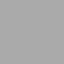

In [72]:
viewer = LavaVuModelViewer(geo_model, background='white')
# viewer.add_scalar_field(intrusion_frame[0])
# viewer.add_scalar_field(intrusion_frame[1])
# viewer.add_scalar_field(intrusion_frame[2])
# viewer.add_data(intrusion_frame[0], colour = 'orange')
# viewer.add_data(intrusion_frame[1], colour = 'purple')
# viewer.add_data(intrusion_frame[2], colour = 'green')
viewer.add_isosurface(intrusion_frame[0], isovalue = 0, colour = 'orange')
# viewer.add_isosurface(intrusion_frame[0], isovalue = 3, colour = 'orange')
# viewer.add_isosurface(intrusion_frame[0], isovalue = -3, colour = 'orange')
# viewer.add_isosurface(intrusion_frame[1], nslices = 20, colour = 'purple')
viewer.add_isosurface(intrusion_frame[1], isovalue = 0, colour = 'purple')
# viewer.add_isosurface(intrusion_frame[1], isovalue = -1, colour = 'purple')
# viewer.add_isosurface(intrusion_frame[1], isovalue = 1, colour = 'purple')
viewer.add_isosurface(intrusion_frame[2], isovalue = 0, colour = 'green')

viewer.rotate([-85,-5, 0])
viewer.interactive()

### Building the intrusion body
1. Create Geological Model of pre-existing units/structures and visualize
2. Find a function to represent the geometry of the body along each coordinate
3. Incorporate intrusion into the geo model
4. Assign some degree of freedom to the function, so we can add probabilistic component

#### 1. Geological Model of Pre-Existing features

In [74]:
# Loading the data 

data = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_1Comformable_data.csv')
data['type'] = 'conformable'
# data.head()
# data['val'].unique()

In [75]:
# Geo model construction using LoopStructural
lower_extent = np.array([0,0,0])
upper_extent = np.array([10,10,10])
model = GeologicalModel(lower_extent,upper_extent)
model.set_model_data(data)
conformable_feature = model.create_and_add_foliation('conformable')

'type' is being replaced with 'feature_name' 



In [76]:
# set stratigraphic column
stratigraphic_column = {}
stratigraphic_column['conformable'] = {}
stratigraphic_column['conformable']['unit5'] = {'min':1.5,'max':np.inf,'id':0, 'colour':'darkgreen'}
stratigraphic_column['conformable']['unit4'] = {'min':1,'max':1.5,'id':1, 'colour':'limegreen'}
stratigraphic_column['conformable']['unit3'] = {'min':.3,'max':1,'id':2, 'colour':'steelblue'}
stratigraphic_column['conformable']['unit2'] = {'min':0,'max':.3,'id':3, 'colour':'dodgerblue'}
stratigraphic_column['conformable']['unit1'] = {'min':-.7,'max':0,'id':4, 'colour':'purple'}
stratigraphic_column['conformable']['unit0'] = {'min':-np.inf,'max':-.7,'id':5, 'colour':'tomato'}

In [77]:
stratigraphic_column['conformable']['unit5'].get('min')

1.5

In [78]:
model.set_stratigraphic_column(stratigraphic_column)


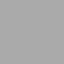

In [79]:
# Visualization of the Geologial model
viewer = LavaVuModelViewer(model, background='white')
viewer.nsteps = np.array([150,150,150])
viewer.add_model()
viewer.add_scalar_field(conformable_feature['feature'])
viewer.rotate([-85,-5, 0])
# viewer.add_data(conformable_feature['feature'])
viewer.interactive()

#### 2. Finding the functions to represent the geometry of the intrusion foor

In [80]:
# load data of the other contact

# Option 1: Constant thickness
floor_points = floor_cp_vals
floor_points.sort_values(['X'], ascending = [True], inplace = True)

# # Option 2: Variable thickness
# floor_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_ObsPoints2_floor.csv')
# floor_points.sort_values(['X'], ascending = [True], inplace = True)
# # floor_points.head()

# get points of intrusion network (in this case, the roof  contact) and floor points
inet_points_array = inet_points[['X','Y','Z']].to_numpy()
floor_points = floor_points.loc[:,['X','Y','Z','gx','gy','gz']].to_numpy()

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [81]:
t  = thickness(inet_points_array,floor_points)
t

array([[2.84211762],
       [3.0140747 ],
       [2.99653007],
       [3.08399734],
       [3.05438001],
       [3.05766725]])

##### 2.1 Find where (in the propagation coordinate) the intrusion changes its orientation
PENDING

In [82]:
# Evaluation intrusion network points in the Propagation coordinate

coord1_inetpts = intrusion_frame[1].evaluate_gradient(geo_model.scale(inet_points_array, inplace = False))

# segment divider points

segments_div_points = np.array([[2.86,5.92,5.10],
                                [6,.71,7.96]])

coord1_div_points = intrusion_frame[1].evaluate_value(geo_model.scale(segments_div_points, inplace = False)) #propagation

In [83]:
coord1_div_points

array([-1.10083559,  1.43277514])

In [84]:
# evaluate floor points
coord0_floorpts = intrusion_frame[0].evaluate_value(geo_model.scale(floor_points[:,:3], inplace = False))
coord1_floorpts = intrusion_frame[1].evaluate_value(geo_model.scale(floor_points[:,:3], inplace = False))
coord2_floorpts = intrusion_frame[2].evaluate_value(geo_model.scale(floor_points[:,:3], inplace = False))

In [85]:
# df of floor points, with values of intrusion frame fields

floor_points_vals = np.zeros([len(floor_points),9])
floor_points_vals[:,:6] = floor_points
floor_points_vals[:,6] = coord0_floorpts
floor_points_vals[:,7] = coord1_floorpts
floor_points_vals[:,8] = coord2_floorpts

floor_points_vals_df = pd.DataFrame(floor_points_vals, columns = ['X','Y','Z','gx','gy','gz','coord0','coord1','coord2'])
floor_points_vals_df.sort_values(['coord1'], ascending = [True], inplace = True)
# floor_points_vals_df.head()

In [86]:
# Identifiation of segment for each floor point

floor_points_vals_df['segment'] = len(segments_div_points)

for j in range(len(coord1_div_points)):
    for i in range(len(floor_points_vals_df)):
        if floor_points_vals_df.loc[i,'segment'] == len(segments_div_points):
            if floor_points_vals_df.loc[i,'coord1'] <= coord1_div_points[j]:
                floor_points_vals_df.loc[i,'segment'] = j        
        else:
            continue
    

In [87]:
floor_points_vals_df = floor_points_vals_df.astype({'segment': str})
floor_points_vals_df

,X,Y,Z,gx,gy,gz,coord0,coord1,coord2,segment
0,1.19,5.54,2.09,NaN,NaN,NaN,5.577566,-1.555603,0.058927,0
1,2.09,2.14,2.09,NaN,NaN,NaN,5.756635,-1.169336,0.589924,0
2,6.69,8.91,4.13,NaN,NaN,NaN,5.957066,0.160831,-0.859250,1
3,9.86,5.49,5.08,NaN,NaN,NaN,5.463407,1.915308,-0.178262,2
4,10.08,4.51,5.11,NaN,NaN,NaN,5.405803,2.036917,0.030671,2
5,10.13,0.10,5.11,NaN,NaN,NaN,5.447081,2.191209,0.979368,2


In [88]:
# define areas of transitions between segments (this zone will be then incorporate the variability of the model)
# for each of this areas, we will calcute a linear function representing the geometry of the intrusion floor

l = 0
for i in range(len(floor_points_vals_df)):
    if i==0: 
        continue
    elif floor_points_vals_df.loc[i,'segment'] == floor_points_vals_df.loc[i-1,'segment']:
        continue
    else:
        prop_difference = floor_points_vals_df.loc[i,'coord1']  - floor_points_vals_df.loc[i-1,'coord1']
        floor_points_vals_df.loc[len(floor_points_vals_df),['coord0','coord1','segment']] = [floor_points_vals_df.loc[i-1,'coord0'],
                                                                                             coord1_div_points[l] - prop_difference*.5,
                                                                                             'transition']
                                                                                             #+ floor_points_vals_df.loc[i-1,'segment']+'/'+ floor_points_vals_df.loc[i,'segment']]
        
        if floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] < floor_points_vals_df.loc[i-1,'coord1']:
            floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] = floor_points_vals_df.loc[i-1,'coord1'] + 0.001
#             print('h')
        
        if floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] > floor_points_vals_df.loc[i,'coord1']:
            floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] = floor_points_vals_df.loc[i,'coord1'] - 0.002
#             print('o')
                                                                                                     
        
        
        floor_points_vals_df.loc[len(floor_points_vals_df),['coord0','coord1','segment']] = [floor_points_vals_df.loc[i,'coord0'],
                                                                                             coord1_div_points[l] + prop_difference*.5,
                                                                                             'transition']
#                                                                                              + floor_points_vals_df.loc[i-1,'segment']+'/'+ floor_points_vals_df.loc[i,'segment']]
        
        if floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] < floor_points_vals_df.loc[i-1,'coord1']:
            floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] = floor_points_vals_df.loc[i-1,'coord1'] + 0.002
#             print('l')
        
        if floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] > floor_points_vals_df.loc[i,'coord1']:
            floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1'] = floor_points_vals_df.loc[i,'coord1'] - 0.001
#             print('a')
        
        l = l+1
 

In [89]:
floor_points_vals_df.sort_values(['coord1'], ascending = [True], inplace = True)
floor_points_vals_df

,X,Y,Z,gx,gy,gz,coord0,coord1,coord2,segment
0,1.19,5.54,2.09,NaN,NaN,NaN,5.577566,-1.555603,0.058927,0
1,2.09,2.14,2.09,NaN,NaN,NaN,5.756635,-1.169336,0.589924,0
6,NaN,NaN,NaN,NaN,NaN,NaN,5.756635,-1.168336,NaN,transition
7,NaN,NaN,NaN,NaN,NaN,NaN,5.957066,-0.435752,NaN,transition
2,6.69,8.91,4.13,NaN,NaN,NaN,5.957066,0.160831,-0.859250,1
8,NaN,NaN,NaN,NaN,NaN,NaN,5.957066,0.555537,NaN,transition
9,NaN,NaN,NaN,NaN,NaN,NaN,5.463407,1.914308,NaN,transition
3,9.86,5.49,5.08,NaN,NaN,NaN,5.463407,1.915308,-0.178262,2
4,10.08,4.51,5.11,NaN,NaN,NaN,5.405803,2.036917,0.030671,2
5,10.13,0.10,5.11,NaN,NaN,NaN,5.447081,2.191209,0.979368,2


In [90]:
def dip_vector(surface_gradients_points):
    #calculates the dip vector of a surface with gradient = surface_gradient
    dip_v = np.zeros([len(surface_gradients_points),3])
    for i in range(len(surface_gradients_points)):
        pox = -surface_gradients_points[i,0]*surface_gradients_points[i,2]
        poy = -surface_gradients_points[i,1]*surface_gradients_points[i,2]
        poz = pow(surface_gradients_points[i,1],2)+pow(surface_gradients_points[i,0],2)
        norm_po = np.linalg.norm(np.array([pox,poy,poz]))
        dip_v[i,:] = np.array([pox,poy,poz])/norm_po
    
    return dip_v

In [91]:
floor_points_vals_df['m'] = 0
floor_points_vals_df['c'] = 0

In [92]:
## lineal function only for transition segments
# for i in range(len(floor_points_vals_df)):
#     if i == 0:
#         floor_points_vals_df.loc[i,'m'] = 0
#         floor_points_vals_df.loc[i,'c'] = floor_points_vals_df.loc[i,'coord0']
    
#     elif floor_points_vals_df.loc[i,'segment'] == 'transition' and floor_points_vals_df.loc[i-1,'segment'] == 'transition':
#             floor_points_vals_df.loc[i,'m'] = (floor_points_vals_df.loc[i,'coord0'] - floor_points_vals_df.loc[i-1,'coord0'])/(floor_points_vals_df.loc[i,'coord1'] - floor_points_vals_df.loc[i-1,'coord1'])
#             floor_points_vals_df.loc[i,'c'] = floor_points_vals_df.loc[i,'coord0'] - (floor_points_vals_df.loc[i,'m']*floor_points_vals_df.loc[i,'coord1'])
#     else:
#         floor_points_vals_df.loc[i,'m'] = 0
#         floor_points_vals_df.loc[i,'c'] = floor_points_vals_df.loc[i,'coord0']
       

In [93]:
#lineal function between every points
for i in range(len(floor_points_vals_df)):
    if i == 0:
        floor_points_vals_df.loc[i,'m'] = 0
        floor_points_vals_df.loc[i,'c'] = floor_points_vals_df.loc[i,'coord0']
    
    else:
        floor_points_vals_df.loc[i,'m'] = (floor_points_vals_df.loc[i,'coord0'] - floor_points_vals_df.loc[i-1,'coord0'])/(floor_points_vals_df.loc[i,'coord1'] - floor_points_vals_df.loc[i-1,'coord1'])
        floor_points_vals_df.loc[i,'c'] = floor_points_vals_df.loc[i,'coord0'] - (floor_points_vals_df.loc[i,'m']*floor_points_vals_df.loc[i,'coord1'])
       

In [94]:
# floor_points_vals_df.reset_index(inplace = True)
floor_points_vals_df

,X,Y,Z,gx,gy,gz,coord0,coord1,coord2,segment,m,c
0,1.19,5.54,2.09,NaN,NaN,NaN,5.577566,-1.555603,0.058927,0,0.000000,5.577566
1,2.09,2.14,2.09,NaN,NaN,NaN,5.756635,-1.169336,0.589924,0,0.463589,6.298726
6,NaN,NaN,NaN,NaN,NaN,NaN,5.756635,-1.168336,NaN,transition,-0.092142,5.648982
7,NaN,NaN,NaN,NaN,NaN,NaN,5.957066,-0.435752,NaN,transition,0.273595,6.076286
2,6.69,8.91,4.13,NaN,NaN,NaN,5.957066,0.160831,-0.859250,1,0.150681,5.932832
8,NaN,NaN,NaN,NaN,NaN,NaN,5.957066,0.555537,NaN,transition,0.000000,5.957066
9,NaN,NaN,NaN,NaN,NaN,NaN,5.463407,1.914308,NaN,transition,-0.363313,6.158900
3,9.86,5.49,5.08,NaN,NaN,NaN,5.463407,1.915308,-0.178262,2,-0.281371,6.002319
4,10.08,4.51,5.11,NaN,NaN,NaN,5.405803,2.036917,0.030671,2,-0.473685,6.370659
5,10.13,0.10,5.11,NaN,NaN,NaN,5.447081,2.191209,0.979368,2,0.267528,4.860870


In [95]:
from LoopStructural.utils.helper import create_surface, get_vectors, create_box
import matplotlib.colors as colors
from matplotlib import cm

# creation of grid using the geological model box

name = 'intrusion'
cmap = 'Dark2'
grid_points, tri = create_box(viewer.bounding_box, viewer.nsteps)
surf = viewer.lv.triangles(name)
surf.vertices(viewer.model.rescale(grid_points))
surf.indices(tri)

# Evaluation of all the points of the grid in the different scalar fields. In this case, only one scalar  field (conformable)
coord0_gridpts = intrusion_frame[0].evaluate_value(geo_model.scale(grid_points, inplace = False))
coord1_gridpts = intrusion_frame[1].evaluate_value(geo_model.scale(grid_points, inplace = False))
coord2_gridpts = intrusion_frame[2].evaluate_value(geo_model.scale(grid_points, inplace = False))

In [96]:
propagation_axis = np.linspace(np.min(coord1_gridpts),np.max(coord1_gridpts),100)
growth_axis = np.zeros(len(propagation_axis))

In [97]:
for j in range(len(floor_points_vals_df)):
# for j in range(6):
    for i in range(len(propagation_axis)):
        if growth_axis[i] == 0:
            if propagation_axis[i] <= floor_points_vals_df.loc[j,'coord1']:
                growth_axis[i] = floor_points_vals_df.loc[j,'m']*propagation_axis[i] + floor_points_vals_df.loc[j,'c']
            elif propagation_axis[i] > floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1']:
                growth_axis[i] = floor_points_vals_df.loc[len(floor_points_vals_df)-1,'m']*propagation_axis[i] + floor_points_vals_df.loc[len(floor_points_vals_df)-1,'c']
                
            else: continue
                

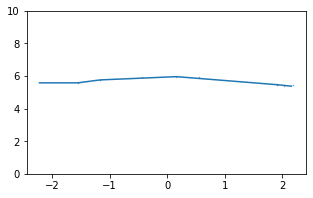

In [118]:
# plotear thickness vs coordinates
fig, ax = plt.subplots(1,1,figsize=(5,3), sharey=False)
ax.plot(propagation_axis[:],growth_axis[:])
ax.scatter(floor_points_vals_df.loc[:,'coord1'], floor_points_vals_df.loc[:,'coord0'], s=0.1)
# ax.set_title('Coord_1/Propagation vs Coord_0/Growth')
ax.set_ylim(0,10)
plt.savefig('Propagation vs Growth.tiff')

In [99]:
indicator_fx_intrusion = np.zeros([len(grid_points),1])

In [100]:
# in this case, the intrusion network is the roof, so every point above it, is not part of the intrusion
for i in range(len(grid_points)):
    if coord0_gridpts[i] < 0:
        indicator_fx_intrusion[i] = -1

In [101]:
for j in range(len(floor_points_vals_df)):
    for i in range(len(grid_points)):
        if indicator_fx_intrusion[i] == -1:
            continue
        elif indicator_fx_intrusion[i] == 1:
            continue
        else:
            if coord1_gridpts[i] <= floor_points_vals_df.loc[j,'coord1']:
                growth_threshold = floor_points_vals_df.loc[j,'m']*coord1_gridpts[i] + floor_points_vals_df.loc[j,'c']
                if coord0_gridpts[i] <= growth_threshold:
                    indicator_fx_intrusion[i] = 1
                else: 
                    indicator_fx_intrusion[i] = -1
            else: continue

for i in range(len(grid_points)):
    if indicator_fx_intrusion[i] == -1:
        continue
    elif indicator_fx_intrusion[i] == 1:
        continue
    else: 
#         if coord1_gridpts[i] > floor_points_vals_df.loc[len(floor_points_vals_df)-1,'coord1']:
        if coord1_gridpts[i] < 1.7:
            growth_threshold = floor_points_vals_df.loc[len(floor_points_vals_df)-1,'m']*coord1_gridpts[i] + floor_points_vals_df.loc[len(floor_points_vals_df)-1,'c']
            if coord0_gridpts[i] <= growth_threshold:
                indicator_fx_intrusion[i] = 1
            else:
                indicator_fx_intrusion[i] = -1
                

In [102]:
counta = sum(1 for i in range(len(indicator_fx_intrusion)) if indicator_fx_intrusion[i] == 1)

intrusion = np.zeros([counta, 7])
j = 0
for n in range(len(indicator_fx_intrusion)):
    if indicator_fx_intrusion[n] == 1:
        intrusion[j,0] = grid_points[n,0] #X coordinate
        intrusion[j,1] = grid_points[n,1] #Y coordinate
        intrusion[j,2] = grid_points[n,2] #Z coordinate
        intrusion[j,3] = indicator_fx_intrusion[n] #intrusion network value, must be 0
        intrusion[j,4] = coord0_gridpts[n]
        intrusion[j,5] = coord1_gridpts[n]
        intrusion[j,6] = coord2_gridpts[n]
        j = j+1

(0.0, 10.0)

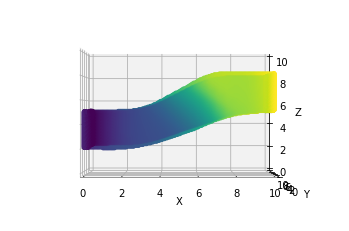

In [103]:
# 3D Visualization of the fields
ax = plt.axes(projection='3d')
# ax.scatter3D(floor_points_vals.loc[:,'X']
# ax.scatter3D(floor_points[:,0],floor_points[:,1],floor_points[:,2], c='blue', s=50)
ax.scatter3D(intrusion[:,0],intrusion[:,1],intrusion[:,2], c = intrusion[:,5], s = 10)
ax.view_init(0, -90)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
# plt.savefig('intrusion_0pts_25grid.tiff')

#### 3. Incorporate intrusion into the geo model

In [104]:
viewer.model.stratigraphic_column.keys()

dict_keys(['conformable'])

In [105]:
name = 'geo_model'
cmap = []
j=0

for g in viewer.model.stratigraphic_column.keys():
    for u,v in viewer.model.stratigraphic_column[g].items():
        cmap.append(v['colour'])
    
points, tri = create_box(viewer.bounding_box, viewer.nsteps)

surf = viewer.lv.triangles(name)
surf.vertices(viewer.model.rescale(points))
surf.indices(tri)
val =  viewer.model.evaluate_model(points,scale=True)

In [106]:
cmap.append('firebrick')

In [107]:
number_units = len(np.unique(val))
# number_units
# np.unique(val)

In [108]:
len(val) == len(indicator_fx_intrusion)

True

In [109]:
new_val = np.empty_like(val)

for i in range(len(indicator_fx_intrusion)):
    if indicator_fx_intrusion[i] == 1:
        new_val[i] = number_units
    else:
        new_val[i] = val[i]

In [110]:
# np.unique(new_val)

In [111]:
# function add_model modified
# cmap = ['tomato', 'purple', 'dodgerblue', 'steelblue', 'limegreen', 'darkgreen', 'red']
surf.values(new_val, 'geo_model')
surf["colourby"] = 'geo_model'

surf.colourmap(cmap,range=(np.nanmin(new_val), np.nanmax(new_val)))

"""0.0000=rgba(0,100,0,1)
 0.1667=rgba(50,205,50,1)
 0.3333=rgba(70,130,180,1)
 0.5000=rgba(30,144,255,1)
 0.6667=rgba(160,32,240,1)
 0.8333=rgba(255,99,71,1)
 1.0000=rgba(178,34,34,1)
 """


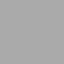

In [116]:
viewer.rotate([-85,-5, 0])
viewer.interactive()